# بسم الله الرحمن الرحيم

# Time Series Models: AR, MA, ARIMA

## Autoregressive Model (AR)

**Definition**:  
An AR model regresses a variable on its own past values:

$$
Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + u_t
$$


## 2. Moving Average Model (MA)

**Definition**:  
An MA model expresses \( Y_t \) as a function of past shocks:

$$
Y_t = u_t + \theta_1 u_{t-1} + \theta_2 u_{t-2} + \dots + \theta_q u_{t-q}
$$

## 3. ARIMA Model (Autoregressive Integrated Moving Average)

**Definition**:  
ARIMA(p, d, q) models combine:

- **AR(p)**: Autoregressive part  
- **I(d)**: Integrated part (number of differences to make the series stationary)  
- **MA(q)**: Moving average part  

The general form:

$$
\Delta^d Y_t = \phi_1 \Delta^d Y_{t-1} + \dots + \phi_p \Delta^d Y_{t-p} + u_t + \theta_1 u_{t-1} + \dots + \theta_q u_{t-q}
$$

**Use**: Models non-stationary data that becomes stationary after differencing.

## 4. Augmented Dickey-Fuller (ADF) Test

Used to test whether a time series is **stationary** or has a **unit root**.

### Hypotheses:
$$
( H_0 ): non-stationary
$$
$$
( H_1 ):  stationary
$$

**ADF**
$$
Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \sum_{i=1}^p \delta_i \Delta Y_{t-i} + u_t
$$
We test:

$$
- ( H_0: \gamma = 1 ) (unit root)
- ( H_1: \gamma < 1 ) (stationary)
$$
### Decision Rule critical value:

- If ADF test statistic < critical value → **Reject \( H_0 \)** → Stationary  
- If ADF test statistic > critical value → **Fail to reject \( H_0 \)** → Unit root (non-stationary)

Note: Critical values come from the **Dickey-Fuller distribution**, not the standard t-distribution.

### Decision Rule p-value:
- If p-value < 0.05 → **Reject \( H_0 \)** → Stationary  
- If p-value > 0.05 > critical value → **Fail to reject \( H_0 \)** → Unit root (non-stationary)
---

## Definition

A **white noise process** $(\{u_t\})$ is a sequence of random variables satisfying:

1. **Zero Mean**  
   $$
   \mathbb{E}[u_t] = 0
   $$

2. **Constant Variance (Homoskedasticity)**  
   $$
   \mathbb{E}[u_t^2] = \sigma^2 < \infty
   $$

3. **No Serial Correlation (Uncorrelatedness)**  
   $$
   \mathbb{E}[u_t u_s] = 0 \quad \text{for } t \neq s
   $$
---
- **Model Diagnostics**  
  Residuals from a correctly specified model should behave like white noise. If they don't, the model is likely misspecified.

- **Innovation Processes in Time Series**  
  In ARMA models:
  $$
    X_t = \phi X_{t-1} + u_t + \theta u_{t-1}, \quad u_t \sim \text{white noise}
  $$
---

### 📊 ACF and PACF Patterns for ARIMA Models

| Model Type    | ACF Pattern                          | PACF Pattern                          |
|---------------|--------------------------------------|----------------------------------------|
| **AR(p)**     | Tails off (Geometric decay)          | Significant up to lag **p**, then cuts off |
| **MA(q)**     | Significant up to lag **q**, then cuts off | Tails off (Geometric decay)          |
| **ARMA(p, q)**| Tails off (Geometric decay)          | Tails off (Geometric decay)            |

### ARIMA and SARIMA

**Import necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from datetime import datetime

%matplotlib inline

**Read the dataset from Github**

In [16]:
url="https://raw.githubusercontent.com/brahzr/Time-series-Analysis/refs/heads/main/airline_passengers.csv"
df_airline=pd.read_csv(url)
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


**Simple EDA**

In [4]:
#missing values
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


**Dealing with missing values**

In [6]:
df_airline.dropna(axis = 0)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [8]:
df_airline.dropna(axis=0,inplace=True)
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


**In case of filling missing data**

In [179]:
mean = df_airline["Thousands of Passengers"].mean()
df = df_airline.fillna(mean)
df.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [17]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [11]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [14]:
mean_th= df_airline["Thousands of Passengers"].mean()
print(mean_th)

280.2986111111111


In [18]:
df_airline.dropna(axis = 0, inplace = True)
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [19]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [20]:
df_airline["Month"]= pd.to_datetime(df_airline["Month"])

In [21]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


<Axes: >

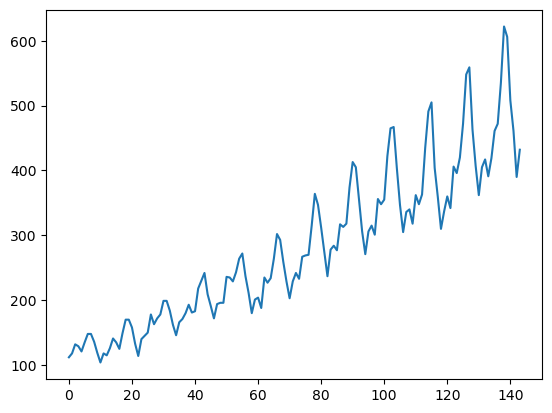

In [22]:
df_airline["Thousands of Passengers"].plot()

In [23]:
df_airline.set_index('Month',inplace=True)

<Axes: xlabel='Month'>

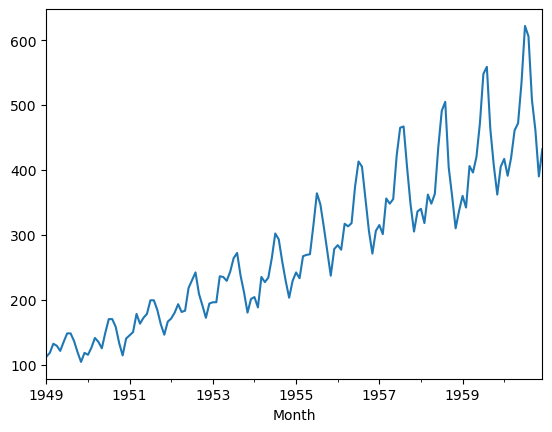

In [24]:
df_airline["Thousands of Passengers"].plot()

<Axes: xlabel='Month'>

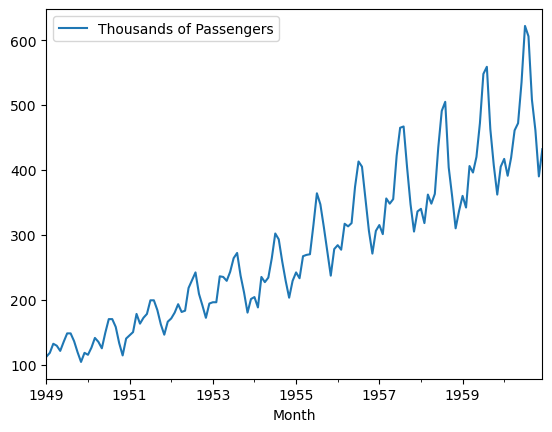

In [104]:
df_airline.plot()

**Stationary Analysis**

In [105]:
#pip install statsmodels

In [106]:
#pip list

In [27]:
from statsmodels.tsa.stattools import adfuller

---

In [28]:
def adf_test(series):
    result = adfuller(series)
    print(result)
    print("ADF Statistics: {}".format(result[0]))
    print("p- value: {}".format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
adf_test(df_airline["Thousands of Passengers"])

(np.float64(0.8153688792060482), np.float64(0.991880243437641), 13, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(996.692930839019))
ADF Statistics: 0.8153688792060482
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [30]:
## Use Techniques Differencing
df_airline["Passengers First Difference"]=df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(1)
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [31]:
adf_test(df_airline["Passengers First Difference"].dropna())

(np.float64(-2.8292668241699994), np.float64(0.0542132902838255), 12, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(988.5069317854084))
ADF Statistics: -2.8292668241699994
p- value: 0.0542132902838255
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
## Use Techniques Differencing
df_airline["Passengers Second Difference"]=df_airline["Passengers First Difference"]-df_airline["Passengers First Difference"].shift(1)

In [34]:
adf_test(df_airline['Passengers Second Difference'].dropna())

(np.float64(-16.384231542468505), np.float64(2.7328918500142407e-29), 11, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(988.60204172756))
ADF Statistics: -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [35]:
### 12 months 
## Use Techniques Differencing
df_airline["Passengers 12 Difference"]=df_airline["Thousands of Passengers"]-df_airline["Thousands of Passengers"].shift(12) # I = 1

In [37]:
adf_test(df_airline["Passengers 12 Difference"].dropna())

(np.float64(-3.383020726492481), np.float64(0.011551493085514952), 1, 130, {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}, np.float64(919.527129208137))
ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [120]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


**ACF and PACF ARIMA**

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

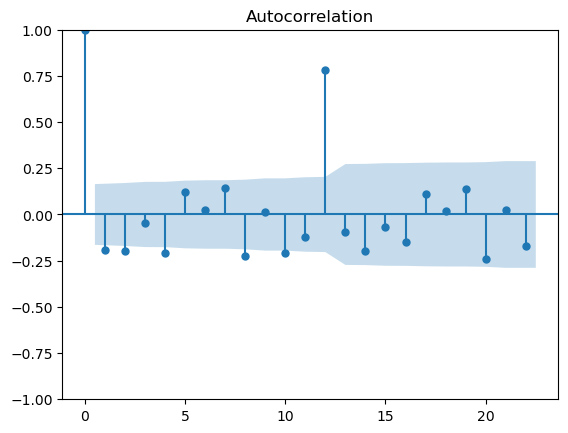

In [39]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

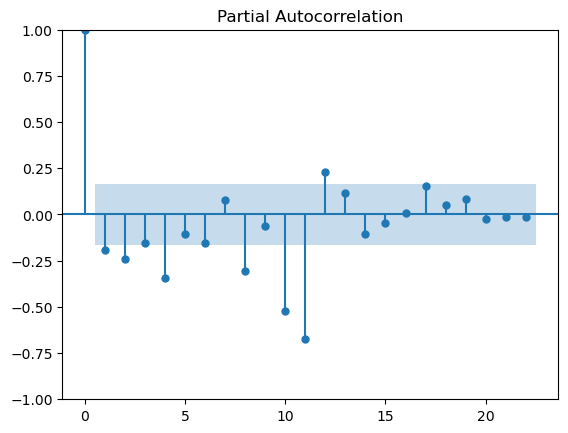

In [40]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

ARIMA(1,1,1), ARIMA(1,1,2), ARIMA(4,1,4)........16

Less AIC <br>
Bigger R squared <br>
Less MSE (Mean Squared Error)

**ACF and PACF SARIMA**

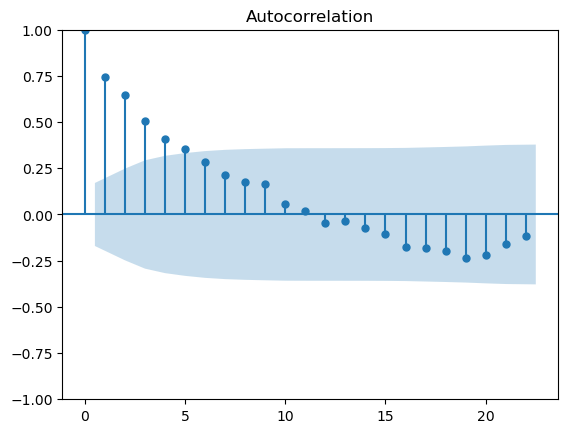

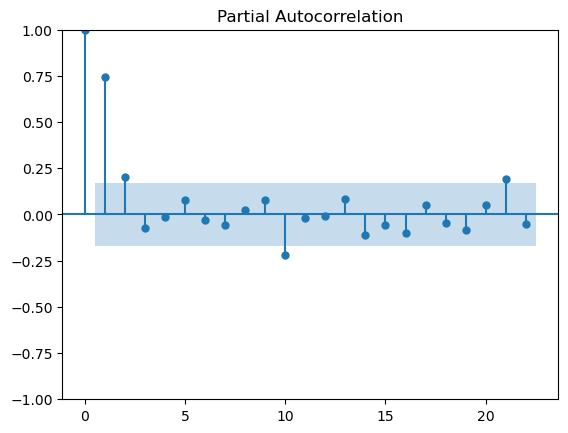

In [180]:
#12 months
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

---

### Forecasting

#### 1.Split and Train

In [41]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [43]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [45]:
train_data=df_airline[:train_dataset_end] #01/01/1949 to 1/12/1955
test_data=df_airline[train_dataset_end+timedelta(1):test_dataset_end] #01/01/1956 to 1/12/1960

In [46]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [47]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [48]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [49]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [50]:
pred_end_date

Timestamp('1960-12-01 00:00:00')

#### 2.Moddeling ARIMA

In [51]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [52]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [64]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'],order=(11,2,12)) #many models p = 11, q=12

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
model_Arima_fit=model_ARIMA.fit()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
print(model_Arima_fit.summary())

                                  SARIMAX Results                                  
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(11, 2, 12)   Log Likelihood                -306.626
Date:                     Sat, 22 Nov 2025   AIC                            661.252
Time:                             20:17:55   BIC                            719.013
Sample:                         01-01-1949   HQIC                           684.442
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8206      0.368     -2.233      0.026      -1.541      -0.100
ar.L2         -0.9376      0.151     -6.194      0.000      -1.234      -0.641
ar.L3       

**Semecting Creteria**

In [140]:
test_data.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0


#### 3.Prediction

In [62]:
##prediction
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [65]:
pred=model_Arima_fit.predict(start=pred_start_date,end= pred_end_date)
residuals=test_data["Thousands of Passengers"]-pred #Y - Y_hat

In [66]:
table = pd.DataFrame({"Test Data": test_data["Thousands of Passengers"],
"Prediction": pred,
"Residuals": residuals})

print(table.head(10))
print(table.tail(10))

            Test Data  Prediction  Residuals
1956-01-01      284.0  285.662014  -1.662014
1956-02-01      277.0  280.017109  -3.017109
1956-03-01      317.0  291.906271  25.093729
1956-04-01      313.0  301.832520  11.167480
1956-05-01      318.0  303.064012  14.935988
1956-06-01      374.0  344.476366  29.523634
1956-07-01      413.0  394.376658  18.623342
1956-08-01      405.0  368.887861  36.112139
1956-09-01      355.0  343.235927  11.764073
1956-10-01      306.0  305.510921   0.489079
            Test Data  Prediction   Residuals
1960-03-01      419.0  387.614309   31.385691
1960-04-01      461.0  401.152634   59.847366
1960-05-01      472.0  417.010628   54.989372
1960-06-01      535.0  460.832720   74.167280
1960-07-01      622.0  491.768760  130.231240
1960-08-01      606.0  473.558214  132.441786
1960-09-01      508.0  447.885761   60.114239
1960-10-01      461.0  425.290781   35.709219
1960-11-01      390.0  407.590960  -17.590960
1960-12-01      432.0  421.418664   10.581336

**Residuals Diagnostics**

<Axes: xlabel='Month'>

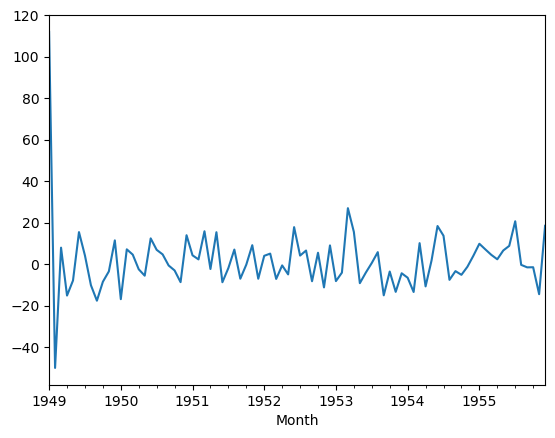

In [144]:
model_Arima_fit.resid.plot()

<Axes: ylabel='Density'>

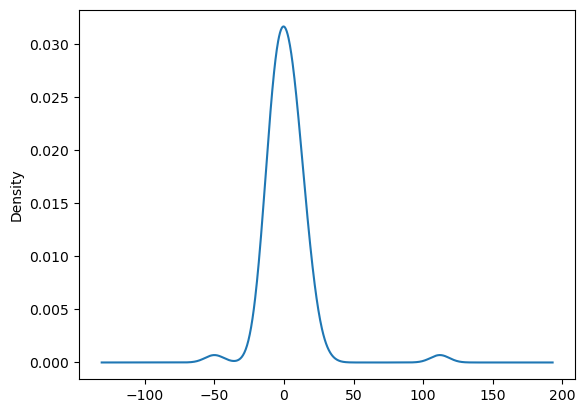

In [145]:
model_Arima_fit.resid.plot(kind = "kde")

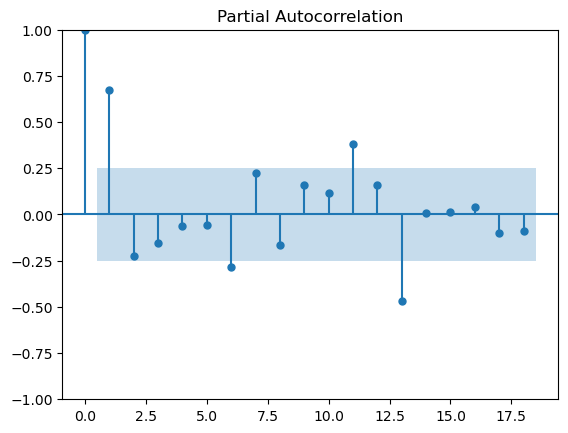

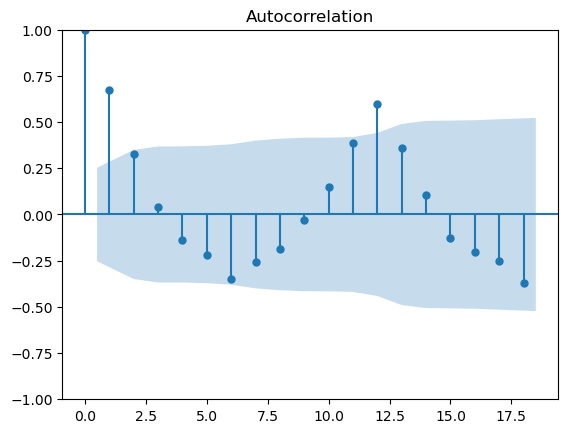

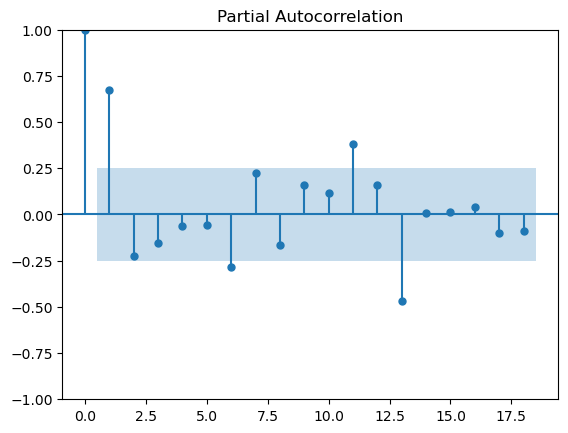

In [67]:
plot_acf(residuals)
plot_pacf(residuals)

In [68]:
test_data["Predicted_ARIMA"]= pred
test_data.head()

C:\Users\Brahim\AppData\Local\Temp\ipykernel_8404\1255057182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_ARIMA"]= pred


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,285.662014
1956-02-01,277.0,-7.0,-13.0,44.0,280.017109
1956-03-01,317.0,40.0,47.0,50.0,291.906271
1956-04-01,313.0,-4.0,-44.0,44.0,301.832520
1956-05-01,318.0,5.0,9.0,48.0,303.064012


<Axes: xlabel='Month'>

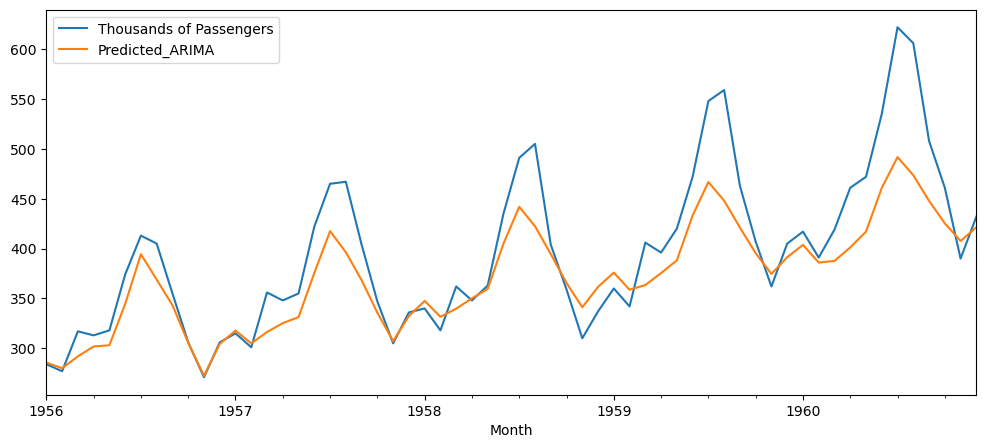

In [69]:
test_data[["Thousands of Passengers","Predicted_ARIMA"]].plot(figsize = (12,5))

**Add the SMA**

C:\Users\Brahim\AppData\Local\Temp\ipykernel_8404\2115127506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["SMA"] = test_data["Thousands of Passengers"].rolling(window = 3).mean()


<Axes: xlabel='Month'>

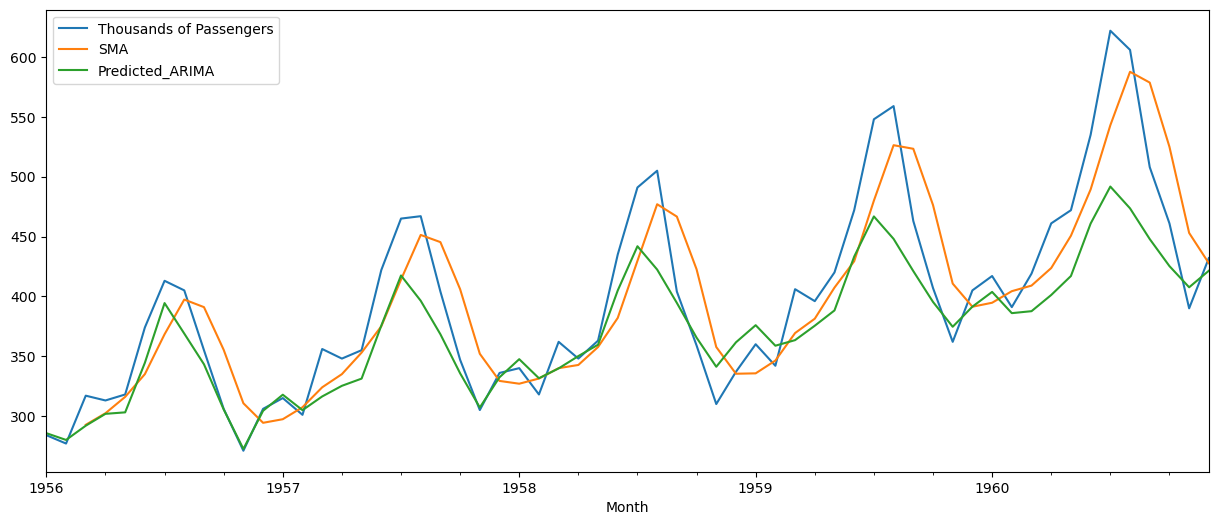

In [70]:
test_data["SMA"] = test_data["Thousands of Passengers"].rolling(window = 3).mean()
test_data[["Thousands of Passengers", "SMA","Predicted_ARIMA"]].plot(figsize = (15,6))

#### 4.Forecasting Future dates

In [71]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_airline.index[-1] + DateOffset (months = x) for x in range(0, 24)]

In [72]:
future_date_dataset = pd.DataFrame(index = future_dates[1:], columns = df_airline.columns)
future_date_dataset.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [73]:
merged_df = pd.concat([df_airline, future_date_dataset])
merged_df.tail()

C:\Users\Brahim\AppData\Local\Temp\ipykernel_8404\1301781756.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat([df_airline, future_date_dataset])


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [74]:
df_airline.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [103]:
merged_df['forecast_arima'] = model_Arima_fit.predict(start ="1960-12-01", end = "1962-11-01", dynamic= True ) #31 months
merged_df

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,forecast_arima
1949-01-01,112.0,NaN,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN,NaN
1949-04-01,129.0,-3.0,-17.0,NaN,NaN
1949-05-01,121.0,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,541.389776
1962-08-01,NaN,NaN,NaN,NaN,524.686317
1962-09-01,NaN,NaN,NaN,NaN,501.825767
1962-10-01,NaN,NaN,NaN,NaN,485.266174


<Axes: >

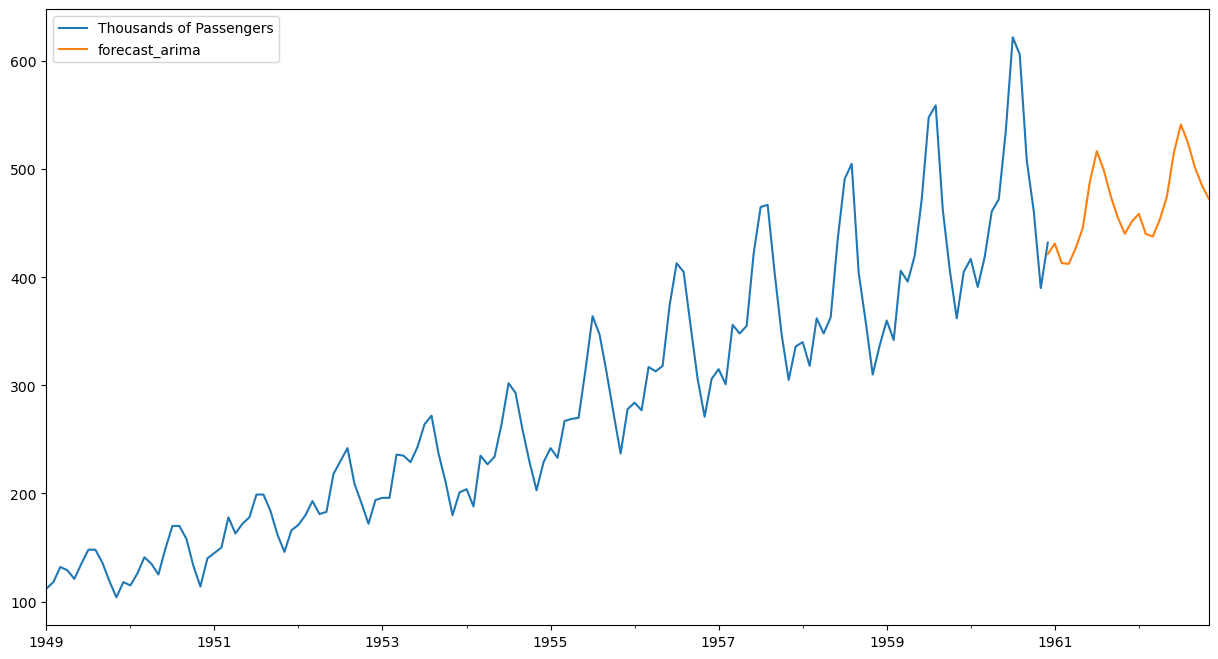

In [104]:
merged_df[['Thousands of Passengers', 'forecast_arima']].plot(figsize = (15, 8))

---

#### 5. Validation

In [155]:
#pip install -U sickit learn

In [156]:
from sklearn.metrics import mean_squared_error
mse_test_Arima  = mean_squared_error(test_data["Thousands of Passengers"], pred)
print("Training MSE:", round(mse_test_Arima,3))

Training MSE: 1821.502


---

### SARIMA

**ACF and PACF**

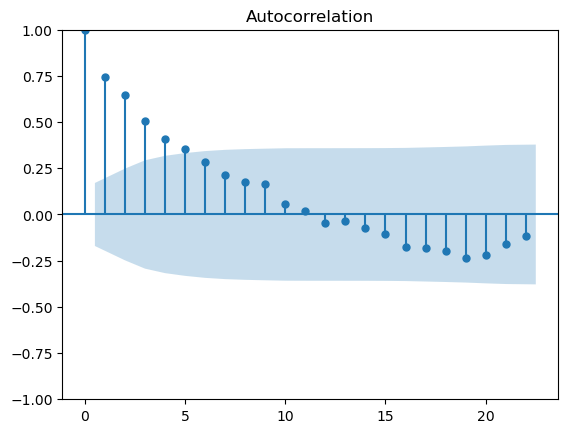

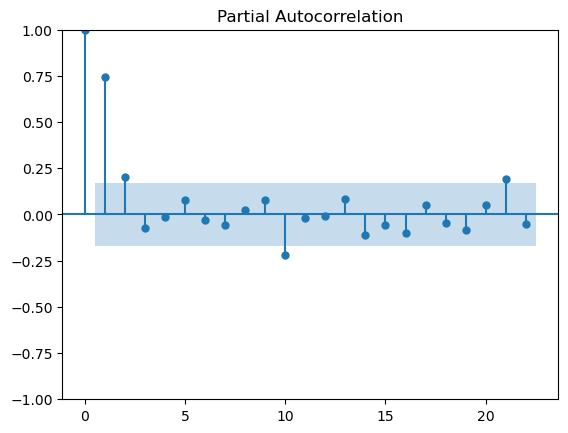

In [78]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [81]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [82]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(1,0,1),seasonal_order=(4,1,5,12))# P,I,Q,F

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [85]:
print(model_SARIMA_fit.summary())

                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(1, 0, 1)x(4, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -262.538
Date:                                          Sat, 22 Nov 2025   AIC                            549.076
Time:                                                  20:43:37   BIC                            576.396
Sample:                                              01-01-1949   HQIC                           559.952
                                                   - 12-01-1955                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [86]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,SMA
Month,,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,473.558214,587.666667
1960-09-01,508.0,-98.0,-82.0,45.0,447.885761,578.666667
1960-10-01,461.0,-47.0,51.0,54.0,425.290781,525.000000
1960-11-01,390.0,-71.0,-24.0,28.0,407.590960,453.000000
1960-12-01,432.0,42.0,113.0,27.0,421.418664,427.666667


In [87]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [88]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred_Sarima

In [89]:
table = pd.DataFrame({"Test Data": test_data["Thousands of Passengers"],
"Prediction": pred_Sarima,
"Residuals": residuals})

print(table.head(10))

            Test Data  Prediction  Residuals
1956-01-01      284.0  292.480636  -8.480636
1956-02-01      277.0  276.943021   0.056979
1956-03-01      317.0  322.602779  -5.602779
1956-04-01      313.0  322.488853  -9.488853
1956-05-01      318.0  332.467968 -14.467968
1956-06-01      374.0  356.878136  17.121864
1956-07-01      413.0  406.067378   6.932622
1956-08-01      405.0  386.002641  18.997359
1956-09-01      355.0  350.210986   4.789014
1956-10-01      306.0  312.897229  -6.897229


**Residuals Diagnostics**

<Axes: xlabel='Month'>

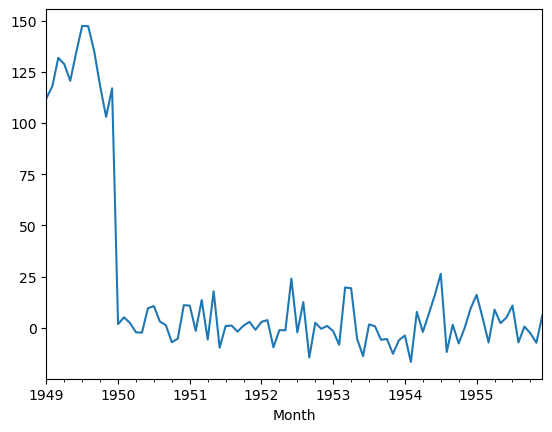

In [90]:
model_SARIMA_fit.resid.plot()

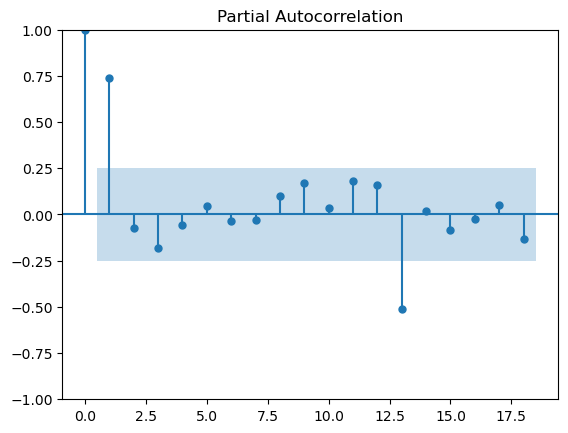

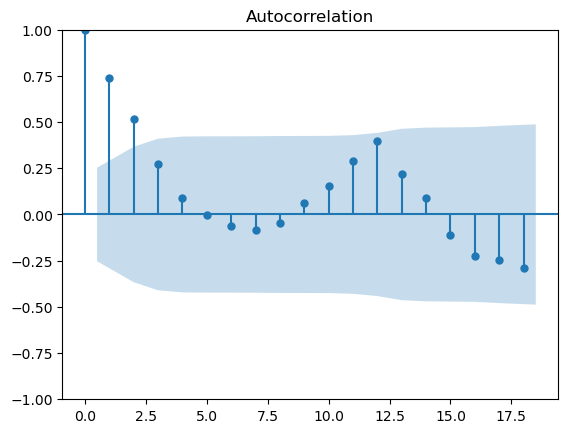

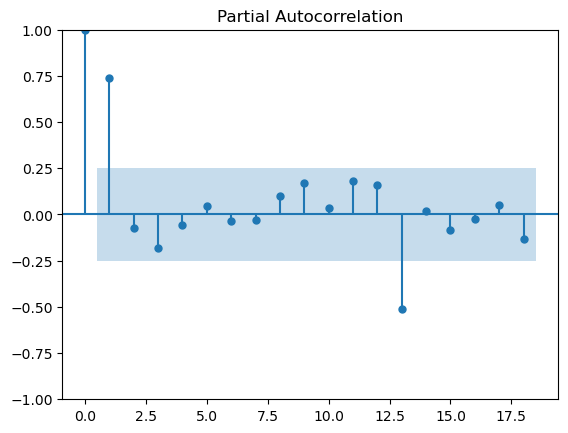

In [91]:
plot_acf(residuals)
plot_pacf(residuals)

<Axes: ylabel='Density'>

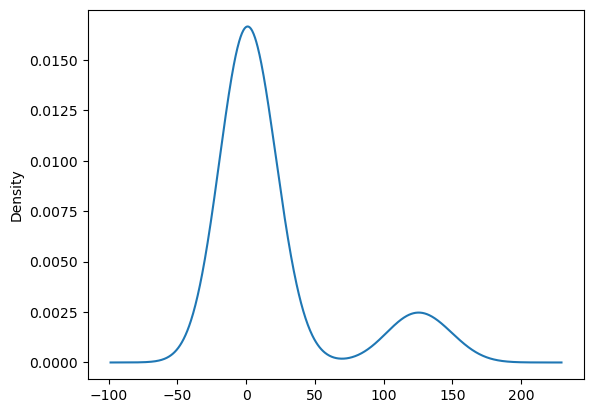

In [93]:
model_SARIMA_fit.resid.plot(kind='kde')

In [94]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Brahim\AppData\Local\Temp\ipykernel_8404\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [96]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,SMA,Predicted_SARIMA
Month,,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,285.662014,NaN,292.480636
1956-02-01,277.0,-7.0,-13.0,44.0,280.017109,NaN,276.943021
1956-03-01,317.0,40.0,47.0,50.0,291.906271,292.666667,322.602779
1956-04-01,313.0,-4.0,-44.0,44.0,301.832520,302.333333,322.488853
1956-05-01,318.0,5.0,9.0,48.0,303.064012,316.000000,332.467968
1956-06-01,374.0,56.0,51.0,59.0,344.476366,335.000000,356.878136
1956-07-01,413.0,39.0,-17.0,49.0,394.376658,368.333333,406.067378
1956-08-01,405.0,-8.0,-47.0,58.0,368.887861,397.333333,386.002641
1956-09-01,355.0,-50.0,-42.0,43.0,343.235927,391.000000,350.210986


<Axes: xlabel='Month'>

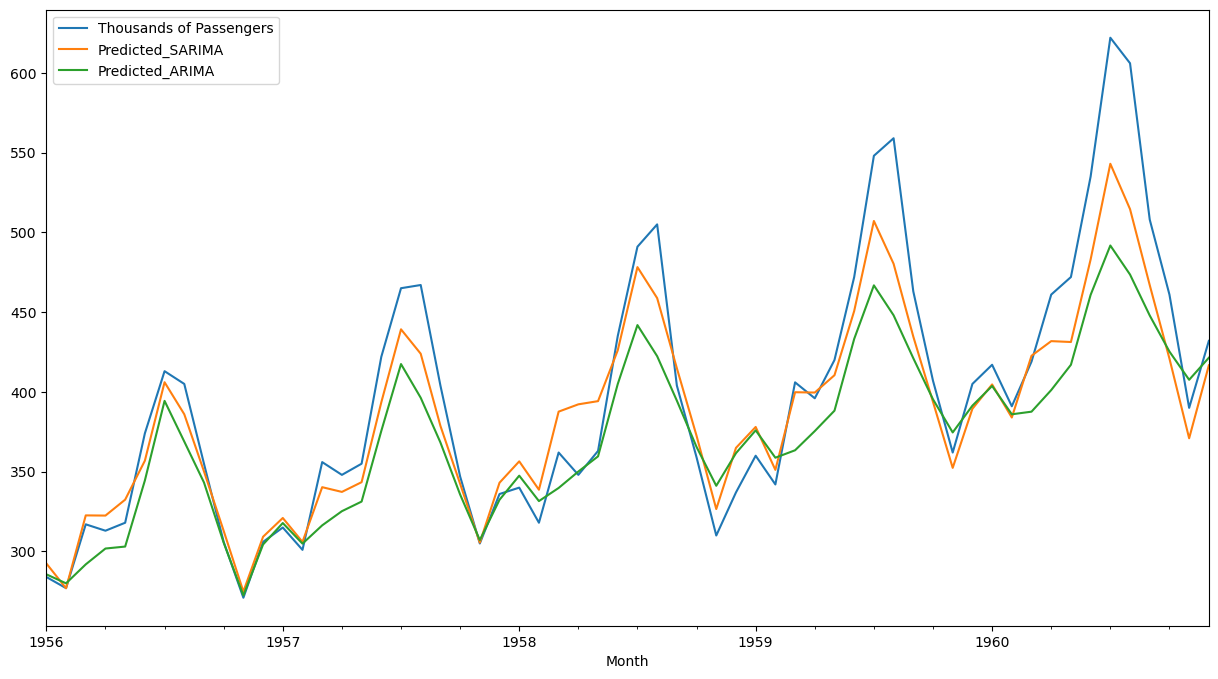

In [97]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize = (15,8))

In [98]:
from pandas.tseries.offsets import DateOffset
future_dates_s = [df_airline.index[-1] + DateOffset (months = x) for x in range(0, 24)]

In [99]:
future_date_dataset = pd.DataFrame(index = future_dates_s[1:], columns = df_airline.columns)
future_date_dataset.tail()
merged_df_s = pd.concat([df_airline, future_date_dataset])
merged_df_s.tail()
df_airline.tail()

C:\Users\Brahim\AppData\Local\Temp\ipykernel_8404\3406878513.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df_s = pd.concat([df_airline, future_date_dataset])


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


C:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

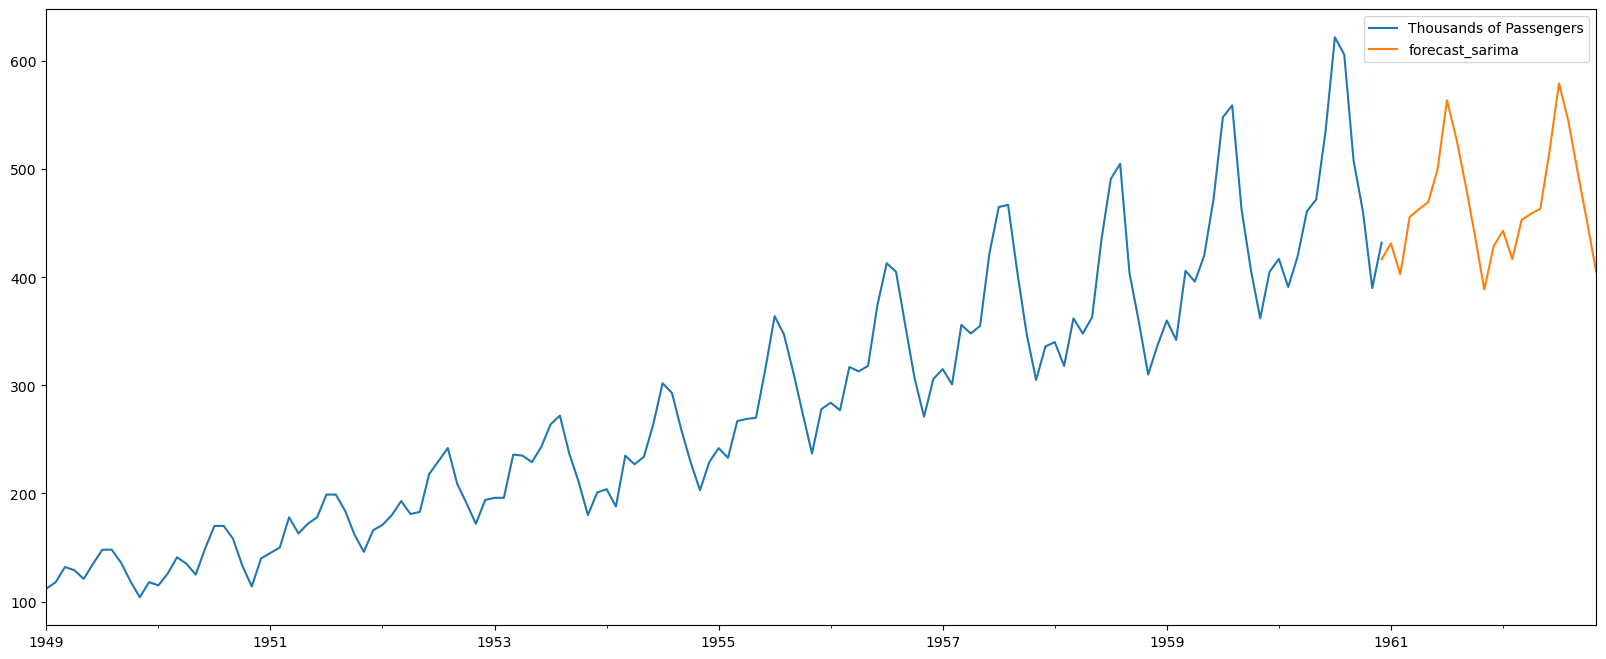

In [100]:
merged_df_s['forecast_sarima'] = model_SARIMA_fit.predict(start ="1960-12-01", end = "1980-11-01", dynamic= True )
merged_df_s[['Thousands of Passengers', 'forecast_sarima']].plot(figsize = (20, 8))

In [175]:
df_airline.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


**Validation**

In [176]:
mse_test_Sarima  = mean_squared_error(test_data["Thousands of Passengers"], pred_Sarima)
print("Training MSE:", round(mse_test_Sarima,3))

Training MSE: 798.691


In [178]:
print(mse_test_Sarima)
print(mse_test_Arima)

798.6914477181268
1821.5022181656984
